<h1> HANDWRITTEN SIGNATURE VERIFICATION 
USING 
CONVOLUTION NEURAL NETWORK (CNN) </h1>

<h2> Part 1 </h2>

_This is Yash Gupta, India Institute of Information Technology, Nagpur representing final year project. Stay and upvote if you like the notebook._

<h2> Outline </h2>

- Introduction
- Literature Survey
- The Proposed Methodology 
- Industrial Application
- Conclusion
- References

<h2> INTRODUCTION </h2>

<h4> 
    
**Problem Statement**  :  
    *The objective is to develop the handwritten verification system using latest advancement in deep learning. Input parameter to this system is pair of two signature in portable network graphics images (PNG) format and outputs the Boolean value (1 or 0).* <br>

**Motivation**  :  
    *Signature is an important aspect for authentication of an individual. Before biometric and even today in the financial field. Signature are the primary way to authenticate personal Identity.*  <br>

**Abstract**   :   
    *We present the convolutional neural networks for feature extraction and supervised machine learning techniques for the verification of handwritten signatures. Raw images of signatures are used to train CNN models for extracting features along with data augmentation. CNN Architectures used are VGG16, Inception-v3, ResNet50, and Xception. The Extracted features are classified into two classes genuine or forgery using Euclidean distance, cosine similarity and supervised learning algorithm such as Logistic Regression, Random Forest, SVM and its variations. Data used for testing is extracted from ICDAR 2011 Signature Dataset and organized in pairwise fashion. The database contains signatures of 69 subjects.*   <br>
    
</h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import glob
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import applications
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import backend as K
import gc
from tensorflow.keras.models import Model
import pickle

2021-09-27 19:41:05.633655: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
train_dir="../input/re-arranged-data/sign_data/Dataset/train"
test_dir="../input/re-arranged-data/sign_data/Dataset/test"

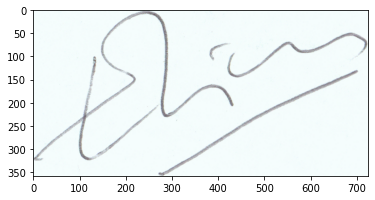

In [3]:
img = plt.imread('../input/re-arranged-data/sign_data/Dataset/train/001/001_01.PNG')
plt.imshow(img)

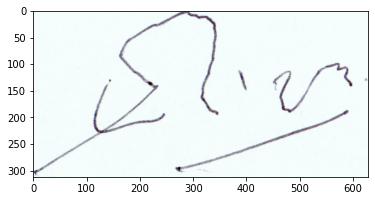

In [4]:
img1 = plt.imread('../input/re-arranged-data/sign_data/Dataset/train/001_forg/0119001_01.png')
plt.imshow(img1)

<h2> Literature Survey </h2>

- In depth study of 25 Research Paper is done before proceeding with the project. Notable Research Paper are mentioned below.

- Fierrez, J., Galbally, J., Ortega-Garcia, J., Freire, M. R., Alonso-Fernandez, F., Ramos, D., ... & Gracia-Roche, J. J. (2010).  An online signature verification methodology has been introduced. The system uses a timeline set with Hidden Markov Models (HMMs). 

- Yang, L., Widjaja, B. K., & Prasad, R. (1995). Application of hidden Markov models for signature verification. Pattern recognition, 28(2), 161-170. The Baum-Welch algorithm is used for training and segregation. Test results based on 496 signatures from 31 studies were presented showing that the HMM process has potential for signature verification.

- Sam, S. M., Kamardin, K., Sjarif, N. N. A., & Mohamed, N. (2019). Offline signature verification using deep learning convolutional neural network (CNN) architectures GoogLeNet inception-v1 and inception-v3.

In [5]:
SIZE = 224

In [6]:
train_data_names = []
test_data_names = []

train_data = []
train_labels = []

for per in os.listdir('../input/re-arranged-data/sign_data/Dataset/train'):
    for data in glob.glob('../input/re-arranged-data/sign_data/Dataset/train/'+per+'/*.*'):
        
        train_data_names.append(data)
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

#Test Data

test_data = []
test_labels = []

for per in os.listdir('../input/re-arranged-data/sign_data/Dataset/test'):
    for data in glob.glob('../input/re-arranged-data/sign_data/Dataset/test/'+per+'/*.*'):
        test_data_names.append(data)
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(np.array(1))
        else:
            test_labels.append(np.array(0))

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [7]:
with open('./train_data_names.pkl', 'wb') as fp:
    pickle.dump(train_data_names, fp)

with open('./test_data_names.pkl', 'wb') as fp:
    pickle.dump(test_data_names, fp)

In [8]:
# Categorical labels
#print(train_labels)
train_labels = to_categorical(train_labels)
#print(train_data.shape)
# Reshaping
train_data = train_data.reshape(-1, SIZE,SIZE, 3)
test_data = test_data.reshape(-1, SIZE,SIZE, 3)

<h2> Industrial Application </h2>

- e-KYC
- Instant Document Verification 
- Banking and Financial Services
- Government Official work

<h2> The Proposed Methodology </h2>

<h4>
1. Dataset <br><br>
2. Proposed System<br><br>
3. Feature Extraction<br><br>
4. Feature Selection<br><br>
5. Classification<br>
</h4>

<h3> Feature Extraction </h3>

1. Convolution neural network (CNN) are popular neural network architectures for working on image dataset. 
2. Total 16 models were trained to compare the accuracy.
3. 4 Architectures Used for Feature Extraction are:-
- VGG16
- Inception-v3
- ResNet-50
- Xception
4. Optimizers used to compile the models are:-
- Stochastic gradient descent (SGD)
- Root Mean Square Propagation (RMSprop
- Adaptive Gradient Algorithm (Adagrad) 
- Active Design and Analysis Modelling (Adam)

<h1> Parameters </h1>

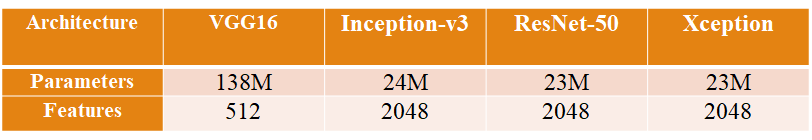

In [9]:
input_ = (224,224,3)
EPOCHS = 20
BS = 64
output_ = 2

<h3> Feature Extraction Results </h3>

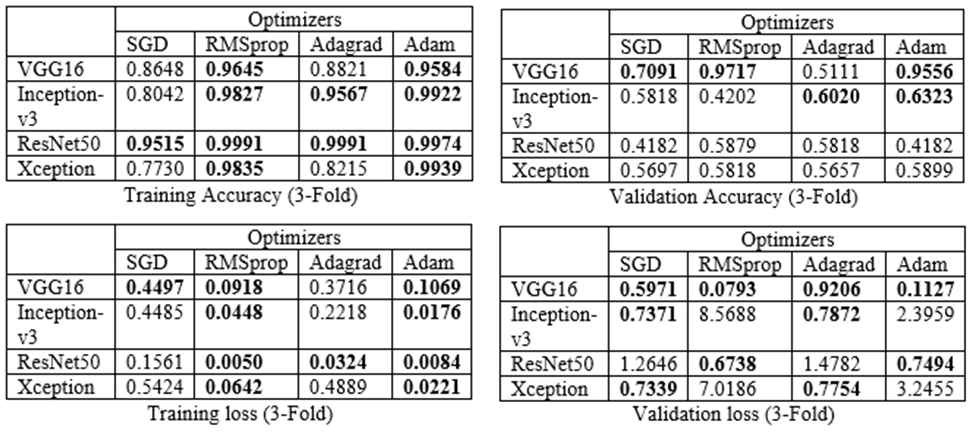

<h3> Graphs of Best Performing Models </h3>

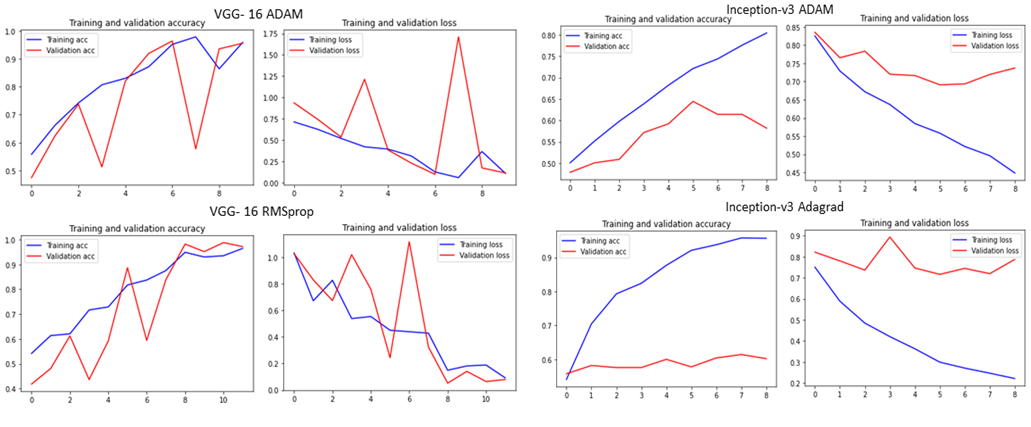

<h3> Feature Selection </h3>

1. The first observation from above tables VGG16 architecture outperformed all other architectures and features from the models which can be used for classification are with at least 95% training accuracy and 60% validation accuracy. 
2. Four models which we choose to test our classification algorithms are:- 
- VGG16 - Adam
- VGG16 – RMSprop
- Inception-v3 – Adam
- Inception-v3 – Adagrad

<h1> VGG16 - ADAM </h1>

2021-09-27 19:41:36.884197: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-27 19:41:36.887612: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-27 19:41:36.927206: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-27 19:41:36.927849: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-27 19:41:36.927906: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-27 19:41:36.955182: I tensorflow/stream_executor/platform/def

58892288/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 21,137,986
Trainable params: 21,137,986
Non-trainable params: 0
_________________________________________________________________


2021-09-27 19:41:40.581103: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-27 19:41:40.591714: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000140000 Hz


Epoch 1/20


2021-09-27 19:41:41.625410: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-27 19:41:42.406845: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-09-27 19:41:42.439543: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


19/19 [==============================] - 27s 718ms/step - loss: 0.9857 - accuracy: 0.4958 - val_loss: 0.7024 - val_accuracy: 0.5717
Epoch 2/20
19/19 [==============================] - 8s 431ms/step - loss: 0.6348 - accuracy: 0.6009 - val_loss: 0.8253 - val_accuracy: 0.5657
Epoch 3/20
19/19 [==============================] - 8s 432ms/step - loss: 0.5058 - accuracy: 0.7590 - val_loss: 0.7829 - val_accuracy: 0.6485
Epoch 4/20
19/19 [==============================] - 8s 429ms/step - loss: 0.3961 - accuracy: 0.8032 - val_loss: 0.8339 - val_accuracy: 0.6889
Epoch 00004: early stopping


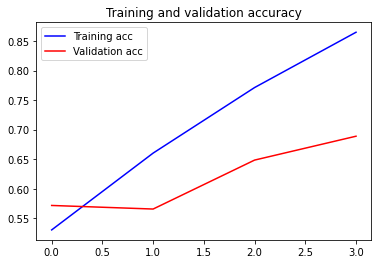

<Figure size 432x288 with 0 Axes>

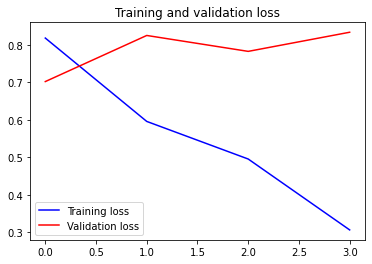

2021-09-27 19:42:32.851361: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 992882688 exceeds 10% of free system memory.


In [10]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./VGG16_Adam_train', intermediate_output_train)
np.save('./VGG16_Adam_test', intermediate_output_test)

<h1> VGG16 - SGD </h1>

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 21,137,986
Trainable params: 21,137,986
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
19/19 [==============================] - 9s 456ms/step - loss: 0.7340 - accuracy: 0.4938 - val_loss: 0

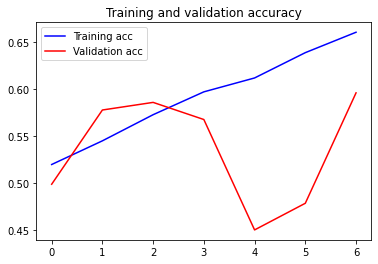

<Figure size 432x288 with 0 Axes>

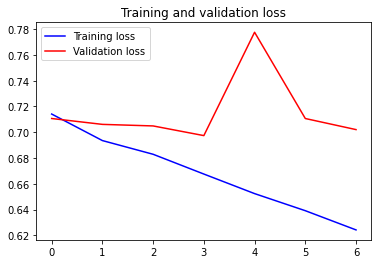

2021-09-27 19:43:44.873327: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 992882688 exceeds 10% of free system memory.


In [11]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./VGG16_SGD_train', intermediate_output_train)
np.save('./VGG16_SGD_test', intermediate_output_test)

<h1> VGG16 - RMSProp </h1>

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 514       
Total params: 21,137,986
Trainable params: 21,137,986
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
19/19 [==============================] - 10s 458ms/step - loss: 1.3590 - accuracy: 0.5292 - val_loss: 

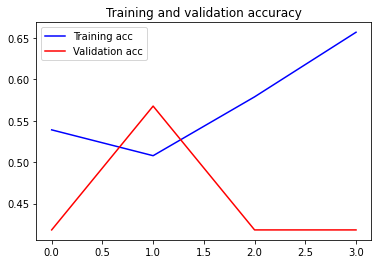

<Figure size 432x288 with 0 Axes>

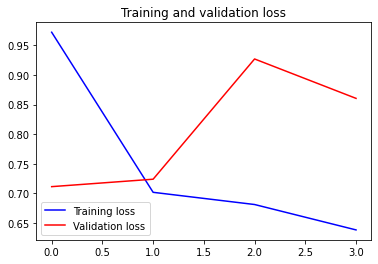

2021-09-27 19:44:27.097307: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 992882688 exceeds 10% of free system memory.


In [12]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./VGG16_RMSprop_train', intermediate_output_train)
np.save('./VGG16_RMSprop_test', intermediate_output_test)

<h1> VGG16 - Adagrad </h1>

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 514       
Total params: 21,137,986
Trainable params: 21,137,986
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
19/19 [==============================] - 10s 457ms/step - loss: 0.7120 - accuracy: 0.5548 - val_loss: 

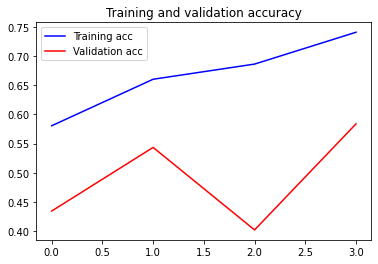

<Figure size 432x288 with 0 Axes>

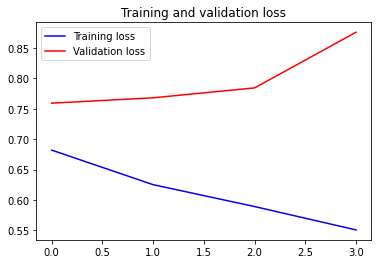

2021-09-27 19:45:08.834902: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 992882688 exceeds 10% of free system memory.


In [13]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adagrad(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./VGG16_Adagrad_train', intermediate_output_train)
np.save('./VGG16_Adagrad_test', intermediate_output_test)

<h1> Inception_v3 - ADAM </h1>

87916544/87910968 [==============================] - 1s 0us/step
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3_input (InputLay [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_4 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 514       
Total params: 34,910,754
Trainable params: 34,876,322
Non-trainable params: 34,432
_________________________________________________________________
Epoch 1/20
19/19 [=========================

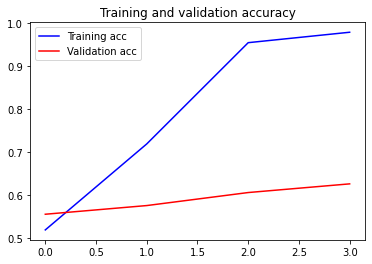

<Figure size 432x288 with 0 Axes>

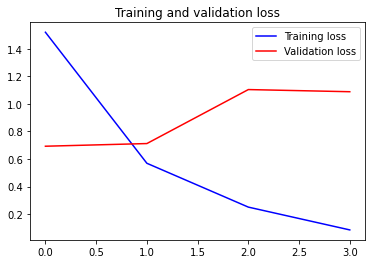

2021-09-27 19:45:51.591741: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 992882688 exceeds 10% of free system memory.


In [14]:
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./InceptionV3_Adam_train', intermediate_output_train)
np.save('./InceptionV3_Adam_test', intermediate_output_test)

<h1> Inception_v3 - SGD </h1>

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3_input (InputLay [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_5 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               13107456  
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 514       
Total params: 34,910,754
Trainable params: 34,876,322
Non-trainable params: 34,432
_________________________________________________________________
Epoch 1/20
19/19 [==============================] - 12s 368ms/step - loss: 0.8483 - accuracy: 0.5083 - val_

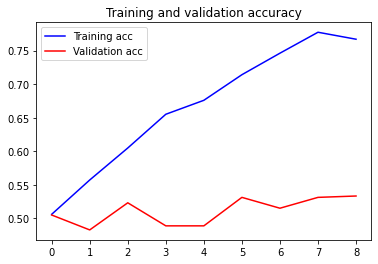

<Figure size 432x288 with 0 Axes>

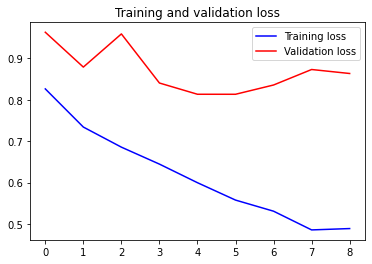

In [15]:
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./InceptionV3_SGD_train', intermediate_output_train)
np.save('./InceptionV3_SGD_test', intermediate_output_test)

<h1> Inception_v3 - RMSprop </h1>

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3_input (InputLay [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_6 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               13107456  
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 514       
Total params: 34,910,754
Trainable params: 34,876,322
Non-trainable params: 34,432
_________________________________________________________________
Epoch 1/20
19/19 [==============================] - 18s 385ms/step - loss: 3.2873 - accuracy: 0.6422 - val_

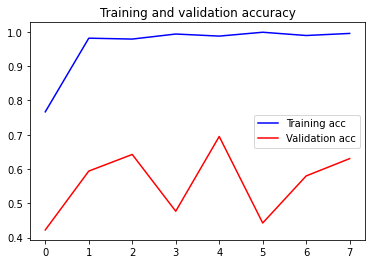

<Figure size 432x288 with 0 Axes>

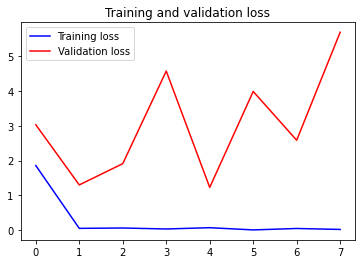

In [16]:
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./InceptionV3_RMSprop_train', intermediate_output_train)
np.save('./InceptionV3_RMSprop_test', intermediate_output_test)

<h1> Inception_v3 - Adagrad </h1>

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3_input (InputLay [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_7 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               13107456  
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 514       
Total params: 34,910,754
Trainable params: 34,876,322
Non-trainable params: 34,432
_________________________________________________________________
Epoch 1/20
19/19 [==============================] - 12s 382ms/step - loss: 0.9286 - accuracy: 0.5099 - val_

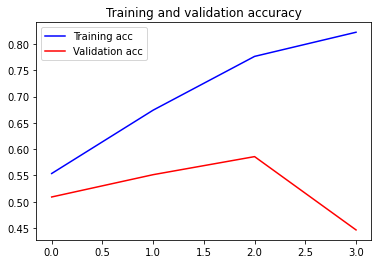

<Figure size 432x288 with 0 Axes>

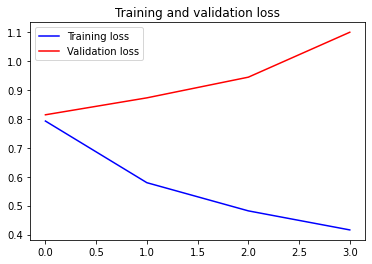

In [17]:
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adagrad(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./InceptionV3_Adagrad_train', intermediate_output_train)
np.save('./InceptionV3_Adagrad_test', intermediate_output_test)

<h1> ResNet50 - Adam </h1>

94773248/94765736 [==============================] - 1s 0us/step
Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50_input (InputLayer)  [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_8 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               25690368  
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 514       
Total params: 49,278,594
Trainable params: 49,225,474
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/20
19/19 [========================

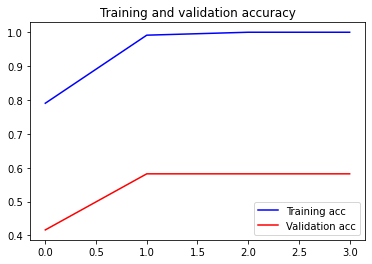

<Figure size 432x288 with 0 Axes>

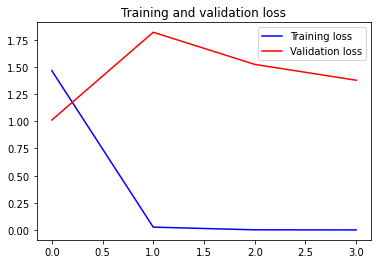

In [18]:
base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./ResNet50_Adam_train', intermediate_output_train)
np.save('./ResNet50_Adam_test', intermediate_output_test)

<h1>  ResNet50 - SGD </h1>

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50_input (InputLayer)  [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_9 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               25690368  
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 514       
Total params: 49,278,594
Trainable params: 49,225,474
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/20
19/19 [==============================] - 13s 416ms/step - loss: 1.0680 - accuracy: 0.5141 - val_

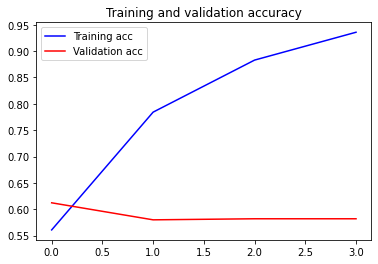

<Figure size 432x288 with 0 Axes>

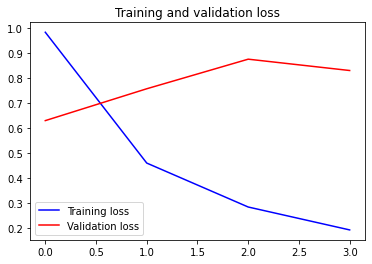

In [19]:
base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./ResNet50_SGD_train', intermediate_output_train)
np.save('./ResNet50_SGD_test', intermediate_output_test)

<h1> ResNet50 - RMSprop </h1>

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50_input (InputLayer)  [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_10 (Flatten)         (None, 100352)            0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               25690368  
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 514       
Total params: 49,278,594
Trainable params: 49,225,474
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/20
19/19 [==============================] - 18s 441ms/step - loss: 5.5375 - accuracy: 0.7097 - val_

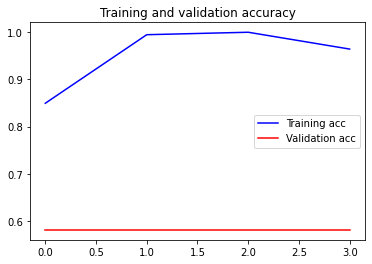

<Figure size 432x288 with 0 Axes>

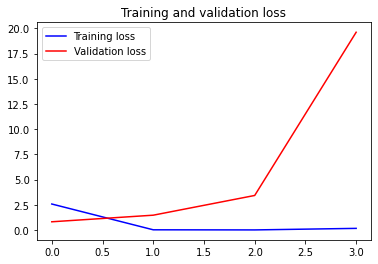

In [20]:
base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./ResNet50_RMSprop_train', intermediate_output_train)
np.save('./ResNet50_RMSprop_test', intermediate_output_test)

<h1> ResNet50 - Adagrad </h1>

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50_input (InputLayer)  [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_11 (Flatten)         (None, 100352)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               25690368  
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 514       
Total params: 49,278,594
Trainable params: 49,225,474
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/20
19/19 [==============================] - 13s 454ms/step - loss: 1.2434 - accuracy: 0.5728 - val_

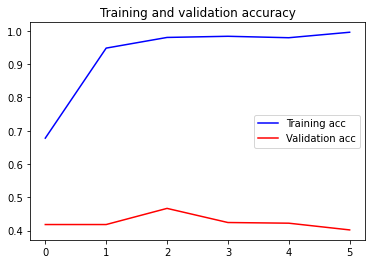

<Figure size 432x288 with 0 Axes>

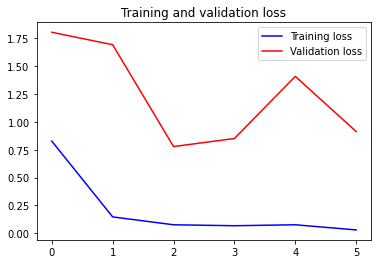

In [21]:
base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adagrad(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./ResNet50_Adagrad_train', intermediate_output_train)
np.save('./ResNet50_Adagrad_test', intermediate_output_test)

<h1> Xception - Adam </h1>

83689472/83683744 [==============================] - 1s 0us/step
Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception_input (InputLayer)  [(None, 224, 224, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_12 (Flatten)         (None, 100352)            0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               25690368  
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 514       
Total params: 46,552,362
Trainable params: 46,497,834
Non-trainable params: 54,528
_________________________________________________________________
Epoch 1/20
19/19 [========================

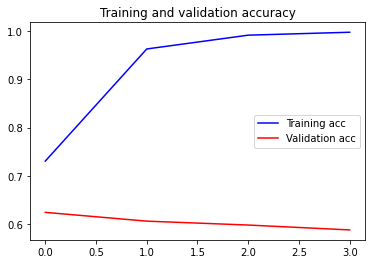

<Figure size 432x288 with 0 Axes>

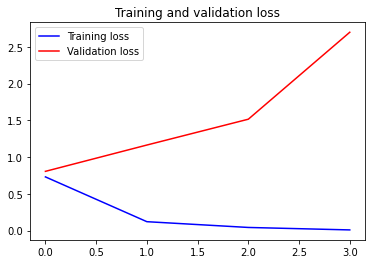

In [22]:
base_model = applications.Xception(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./Xception_Adam_train', intermediate_output_train)
np.save('./Xception_Adam_test', intermediate_output_test)

<h1> Xception - SGD </h1>

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception_input (InputLayer)  [(None, 224, 224, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_13 (Flatten)         (None, 100352)            0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               25690368  
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 514       
Total params: 46,552,362
Trainable params: 46,497,834
Non-trainable params: 54,528
_________________________________________________________________
Epoch 1/20
19/19 [==============================] - 19s 828ms/step - loss: 0.7213 - accuracy: 0.5244 - val_

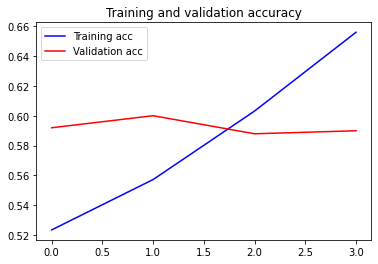

<Figure size 432x288 with 0 Axes>

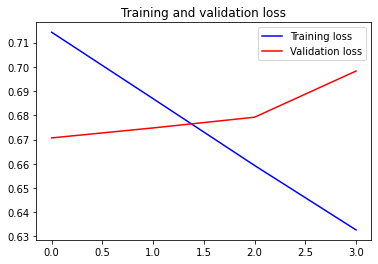

In [23]:
base_model = applications.Xception(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./Xception_SGD_train', intermediate_output_train)
np.save('./Xception_SGD_test', intermediate_output_test)

<h1> Xception - RMSprop </h1>

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception_input (InputLayer)  [(None, 224, 224, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_14 (Flatten)         (None, 100352)            0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               25690368  
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 514       
Total params: 46,552,362
Trainable params: 46,497,834
Non-trainable params: 54,528
_________________________________________________________________
Epoch 1/20
19/19 [==============================] - 23s 837ms/step - loss: 2.3723 - accuracy: 0.5853 - val_

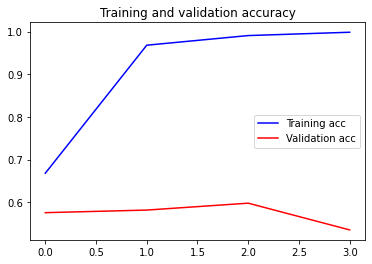

<Figure size 432x288 with 0 Axes>

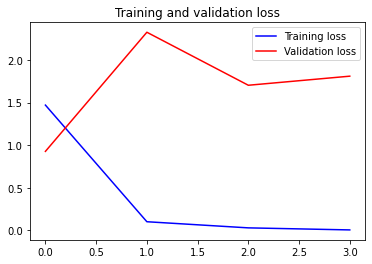

In [24]:
base_model = applications.Xception(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./Xception_RMSprop_train', intermediate_output_train)
np.save('./Xception_RMSprop_test', intermediate_output_test)

<h1> Xception - Adagrad </h1>

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception_input (InputLayer)  [(None, 224, 224, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_15 (Flatten)         (None, 100352)            0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               25690368  
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 514       
Total params: 46,552,362
Trainable params: 46,497,834
Non-trainable params: 54,528
_________________________________________________________________
Epoch 1/20
19/19 [==============================] - 19s 855ms/step - loss: 0.7090 - accuracy: 0.5197 - val_

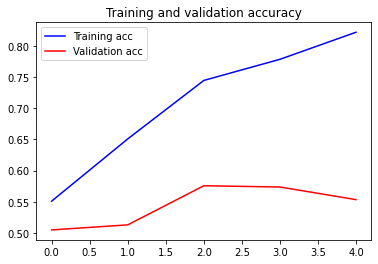

<Figure size 432x288 with 0 Axes>

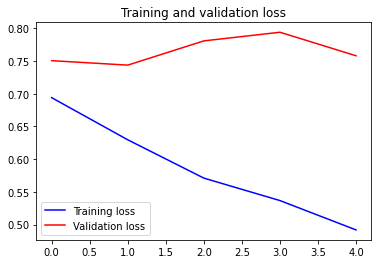

In [25]:
base_model = applications.Xception(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adagrad(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./Xception_Adagrad_train', intermediate_output_train)
np.save('./Xception_Adagrad_test', intermediate_output_test)